In [1]:
import pandas as pd
import numpy as np

In [4]:
import matplotlib.pyplot as plt
# plt.rcParams['figure.figsize'] = (25, 6)
%matplotlib inline

In [21]:
prob_data = pd.read_csv('data/baseline_need_evaluate.csv')

In [22]:
nbins = 100

In [23]:
numr = prob_data.groupby('prob').apply(lambda x: x[x['cover']==1]['eid'].unique().shape[0])

In [24]:
numr = numr.reset_index()

In [25]:
numr.columns=['prob','count']

In [26]:
denr = prob_data.groupby('prob').apply(lambda x: x['eid'].unique().shape[0])

In [27]:
denr = denr.reset_index()

In [28]:
denr.columns=['prob','count']

In [29]:
numr_bins, bins_n = np.histogram(numr['prob'],weights=numr['count'],bins = nbins)

In [30]:
denr_bins, bins_d = np.histogram(denr['prob'],weights=denr['count'], bins=nbins)

In [31]:
final_motherfucking_values = numr_bins/(denr_bins+1)

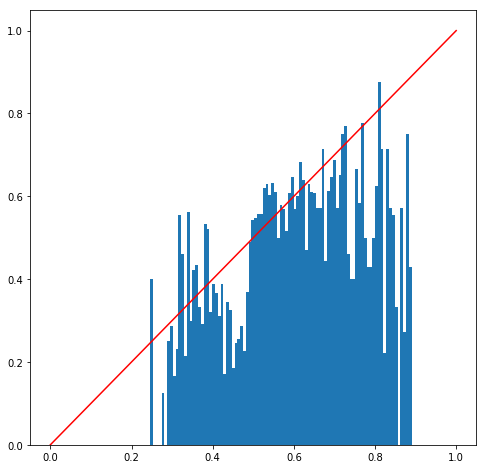

In [41]:
fig,ax = plt.subplots(figsize=(8,8))
ax.bar(bins_d[:-1],final_motherfucking_values, width=np.diff(bins_d),align='edge')
x = np.linspace(0,1)
ax.plot(x,x,color='red')